In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
#importing modules

In [3]:
df=pd.read_csv('train.csv')
#reading data

In [4]:
df.head()
#head of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
#dropping id, name and ticket as these are not continuous and dropping cabin as  most of cabin is Nan and also not continuous

In [7]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)
df=pd.concat([df,sex,embark],axis=1)
df=df.drop(['Sex','Embarked'],axis=1)
#defining data

In [8]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [9]:
df.to_csv('out.csv')

In [10]:
df=df.dropna()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

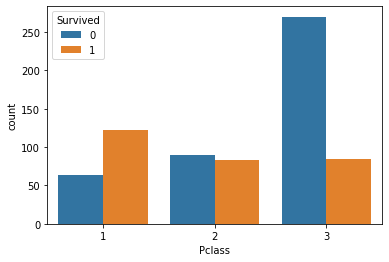

In [11]:
sns.countplot(x='Pclass',hue='Survived',data=df)
#more people has survived is first class then in third class

<AxesSubplot:xlabel='Age', ylabel='Survived'>

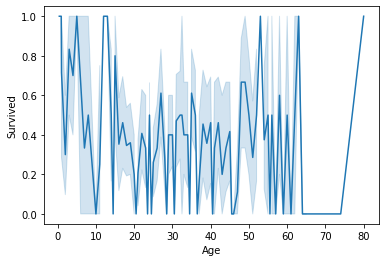

In [12]:
sns.lineplot(x='Age',y='Survived',data=df)
#chances of survival is good when you are young than when you are middle ages(20-60)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

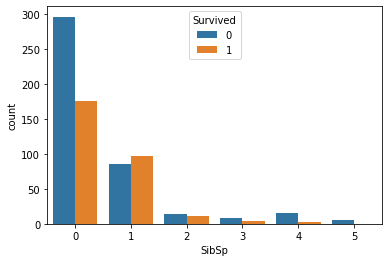

In [13]:
sns.countplot(x='SibSp',hue='Survived',data=df)
#not enough data to prove anything solidly

<AxesSubplot:xlabel='Parch', ylabel='count'>

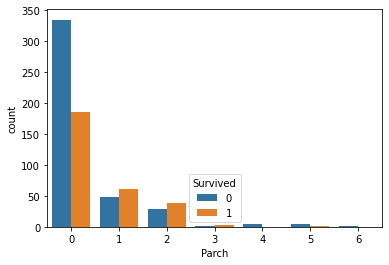

In [14]:
sns.countplot(x='Parch',hue='Survived',data=df)
#50 % chance of dead/survival on 0 parch...rest not enough data

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

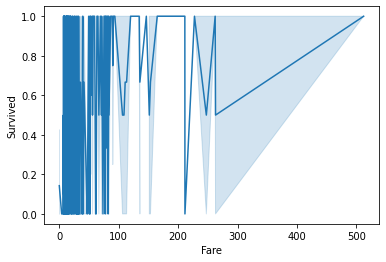

In [15]:
sns.lineplot(x='Fare',y='Survived',data=df)
#high fare= more chance of survival

<AxesSubplot:xlabel='male', ylabel='count'>

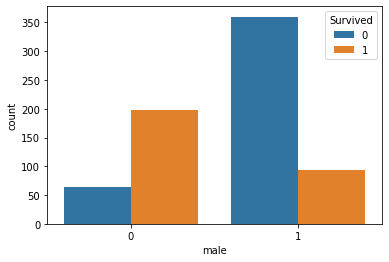

In [16]:
sns.countplot(x='male',hue='Survived',data=df)
#male== dead mostly, female=survived (high chance)

<AxesSubplot:xlabel='Q', ylabel='count'>

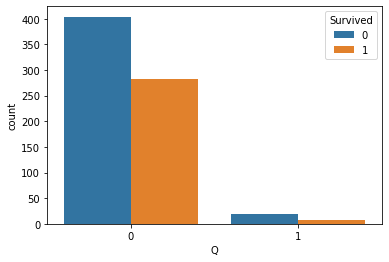

In [17]:
sns.countplot(x='Q',hue='Survived',data=df)
#people boarding from Queensland are less in number so not enough data

<AxesSubplot:xlabel='S', ylabel='count'>

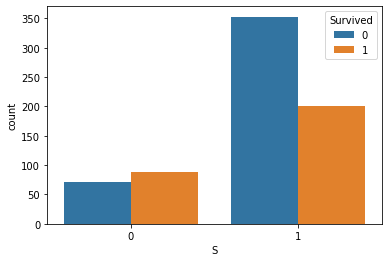

In [18]:
sns.countplot(x='S',hue='Survived',data=df)
#greater than 50% chance of death

In [19]:
sd=0
for i in range(df.shape[0]):
    if df.iloc[i,7]==0 and df.iloc[i,8]==0:
        if df.iloc[i,0]==1:
            sd=sd+1
print((sd/len(df.iloc[:,7:][(df['Q']==0)&(df['S']==0)]))*100)
# approx 61% people survived

61.36363636363637


In [20]:
from sklearn.model_selection import train_test_split
#importing module

In [21]:
X=df.drop('Survived',axis=1)
#defining features

In [22]:
Y=df['Survived']
#defining output

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=60,train_size=0.7,test_size=0.3)
#splitting training and testing set

In [24]:
from sklearn.linear_model import LogisticRegression
#importing logistic regression

In [25]:
logmodel=LogisticRegression(max_iter=1000,dual=False)
#calling logistic regression

In [26]:
logmodel.fit(X_train,y_train)
#fitting the data

LogisticRegression(max_iter=1000)

In [27]:
predictions=logmodel.predict(X_test)
#predicting for test set

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
#importing modules

In [29]:
print(confusion_matrix(predictions,y_test),classification_report(predictions,y_test))
#accuracy on test set

[[113  21]
 [ 16  65]]               precision    recall  f1-score   support

           0       0.88      0.84      0.86       134
           1       0.76      0.80      0.78        81

    accuracy                           0.83       215
   macro avg       0.82      0.82      0.82       215
weighted avg       0.83      0.83      0.83       215

